Assume you have two coins.  

* You choose one coin at random
* One is biased and returns heads 80% of the time.  
* One is fair.  

Given the data, how do you guess which coin you've seen

#### pymc3

In [11]:

import pymc3 as pm
import theano
import numpy as np

data = np.random.randint(0, 2, size=10)

with pm.Model() as model:
    pickCoin = pm.DiscreteUniform("pickCoin", lower=0, upper=1)
    
    #no need to model these.  We know we have two coins.  No prior and posterior needed.
    #fair = pm.Binomial('fair', n=10, p=0.5)
    #biased = pm.Binomial('biased', n=10, p=0.8)
    
    chosen = pm.math.switch(theano.tensor.eq(pickCoin,0), 0.5, 0.8)
    
    #could we use bernoulli here? No n needed. 
    #y  = pm.Binomial('y', n=10, p=chosen, observed=data)
    y   = pm.Bernoulli('y', p=chosen, observed=data)

/Users/larsonte/anaconda3/envs/keras2/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [12]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]
    

100%|██████████| 18000/18000 [00:02<00:00, 6990.83it/s]


In [13]:
data

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [35]:
#dir(burned_trace)
burned_trace.varnames

['pickCoin']

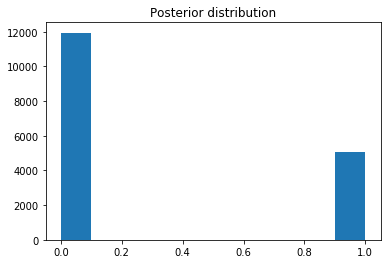

In [15]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

 
#figsize(12.5, 4)
plt.title("Posterior distribution")
h = plt.hist(burned_trace["pickCoin"], bins=10, histtype="stepfilled")
#plt.legend(loc="best");



In [16]:
trace['pickCoin'][:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
# worth a look: 
# - https://people.duke.edu/~ccc14/sta-663/PyMC3.html
# - http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/Ch2_MorePyMC_PyMC3.ipynb


In [ ]:
# need to graph this to see which is more likely?
# how do I just graph a quick expected value?



### Edward

In [42]:
#need at least version 1.2 of tf to get this to work.  On your mac pro you appear to have version 1.0.

#update: keras2 kernel/env now has tf 1.2

In [1]:
from edward.models import Binomial, Beta
import tensorflow as tf

p = [0.5, 0.8]
#dist = Binomial(total_count=4., probs=p)
dist = Binomial(total_count=4., probs=p, value=tf.zeros(2, dtype=tf.float32)) #not sure what values does here but it must be 2.


# https://discourse.edwardlib.org/t/beta-binomial-example/289
# http://edwardlib.org/api/ed/models/Binomial

n = 20
pi_true = .4
n_obs = 100
x_data = np.random.binomial(n=n, p=pi_true, size=n_obs)

# ---- define model ----
pi = Beta(1.0, 1.0) #not needed just took this from an example to make things work. 
x = Binomial(n * tf.ones(n_obs), 
             pi * tf.ones(n_obs), 
             value=tf.zeros(n_obs, dtype=tf.float32)) #value needed if you don't provide sample_n

NameError: name 'np' is not defined